In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inlation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')
loan
m2inlation
mhp

,기준연도,기준월,매매상승률,매매지수,전세상승률,전세지수,월세상승률,월세지수
0,2024,3,-0.12%,95.8,0.05%,92.6,0.09%,102.0
1,2024,2,-0.14%,95.9,0.03%,92.6,0.10%,101.9
2,2024,1,-0.14%,96.0,0.05%,92.5,0.07%,101.8
3,2023,12,-0.10%,96.2,0.12%,92.5,0.10%,101.7
4,2023,11,0.04%,96.3,0.27%,92.4,0.14%,101.6
...,...,...,...,...,...,...,...,...
70,2018,5,-0.03%,90.1,-0.28%,94.8,-0.12%,99.5
71,2018,4,0.06%,90.1,-0.19%,95.1,-0.10%,99.6
72,2018,3,0.12%,90.1,-0.13%,95.2,-0.07%,99.7
73,2018,2,0.20%,90.0,-0.09%,95.4,-0.05%,99.7


In [3]:
loan.head()

,Unnamed: 0,예금취급기관,예금은행,비은행예금취급기관,합계,기준년도,기준월,지역
0,0,408773.7,350423.8,58349.9,817547.4,2022,12,서울
1,1,411123.9,352212.1,58911.8,822247.8,2022,11,서울
2,2,412196.5,353154.8,59041.7,824393.0,2022,10,서울
3,3,412258.7,353379.7,58879.0,824517.4,2022,9,서울
4,4,412379.4,353680.2,58699.2,824758.8,2022,8,서울


In [12]:
m2inlation.head()

,기준연도,기준월,통화량,인플레이션
0,2018,1,5.5,0.8
1,2018,2,6.2,1.3
2,2018,3,5.8,1.2
3,2018,4,5.7,1.5
4,2018,5,5.9,1.5
...,...,...,...,...
70,2023,11,2.4,3.3
71,2023,12,3.1,3.2
72,2024,1,3.0,2.8
73,2024,2,3.4,3.1


In [5]:
mhp.head()

,기준연도,기준월,매매상승률,매매지수,전세상승률,전세지수,월세상승률,월세지수
0,2024,3,-0.12%,95.8,0.05%,92.6,0.09%,102.0
1,2024,2,-0.14%,95.9,0.03%,92.6,0.10%,101.9
2,2024,1,-0.14%,96.0,0.05%,92.5,0.07%,101.8
3,2023,12,-0.10%,96.2,0.12%,92.5,0.10%,101.7
4,2023,11,0.04%,96.3,0.27%,92.4,0.14%,101.6


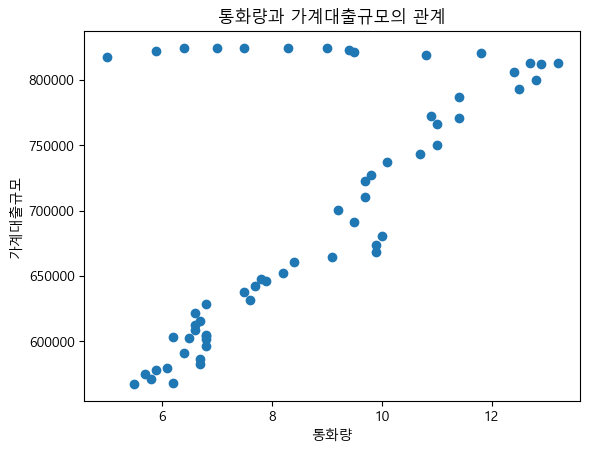

In [10]:
import pandas as pd

# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# 열 이름 지정
loan.columns = ['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준연도', '기준월', '지역']
m2inflation.columns = ['기준연도', '기준월', '통화량', '인플레이션']
mhp.columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']

# 데이터 결합하기
merged_data = pd.merge(loan, m2inflation, on=['기준연도', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# 데이터 시각화하기
# 이 부분에서 원하는 시각화 작업을 수행하세요.

# 예시로 산점도를 그려보겠습니다.
import matplotlib.pyplot as plt

plt.scatter(merged_data['통화량'], merged_data['합계'])
plt.xlabel('통화량')
plt.ylabel('가계대출규모')
plt.title('통화량과 가계대출규모의 관계')
plt.show()


   기준연도  기준월  매매상승률  매매지수  전세상승률  전세지수  월세상승률   월세지수
0  2024    3  -0.12  95.8   0.05  92.6   0.09  102.0
1  2024    2  -0.14  95.9   0.03  92.6   0.10  101.9
2  2024    1  -0.14  96.0   0.05  92.5   0.07  101.8
3  2023   12  -0.10  96.2   0.12  92.5   0.10  101.7
4  2023   11   0.04  96.3   0.27  92.4   0.14  101.6


C:\Users\cchok\AppData\Local\Temp\ipykernel_24728\39031501.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


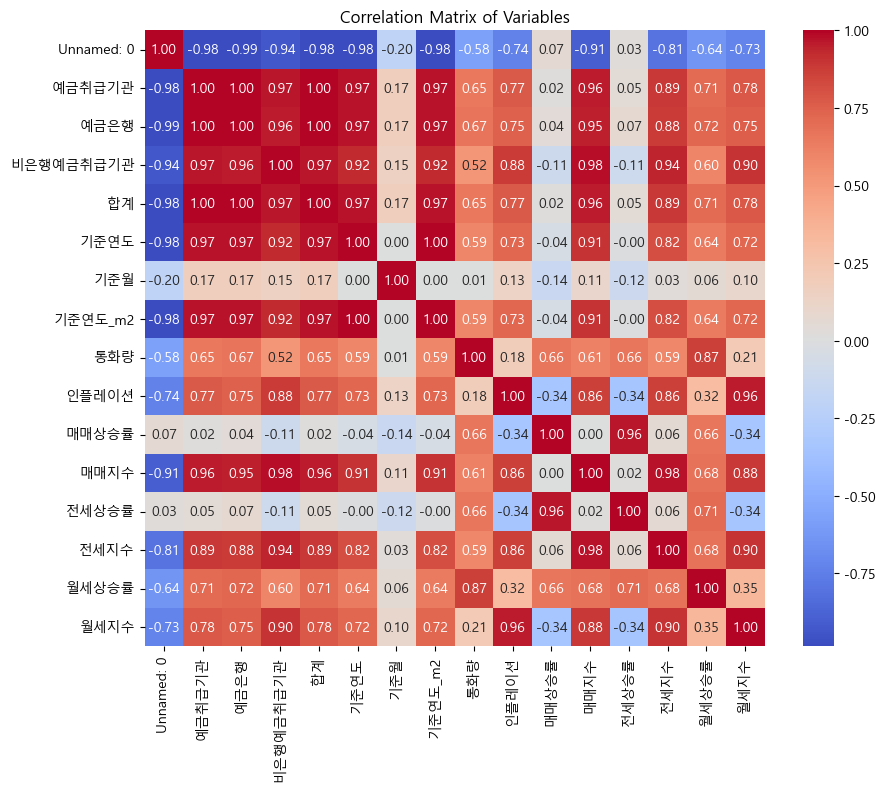

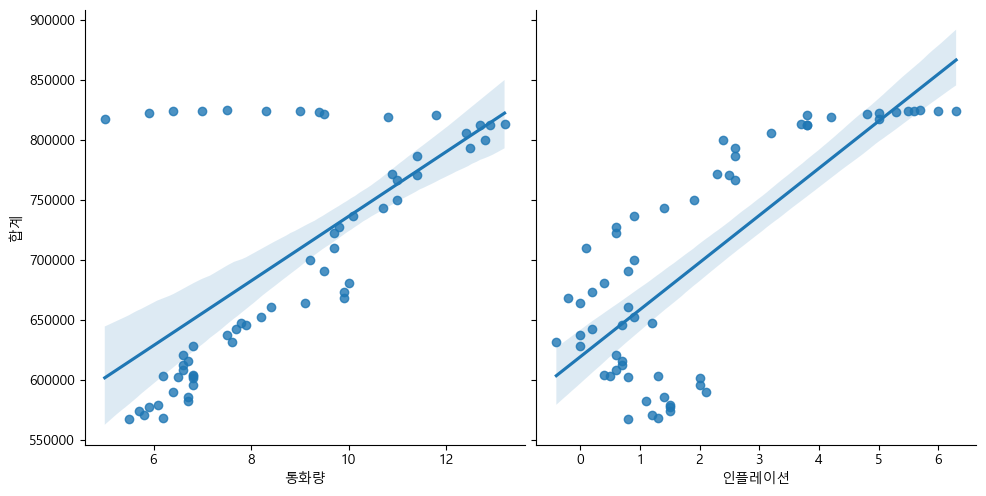

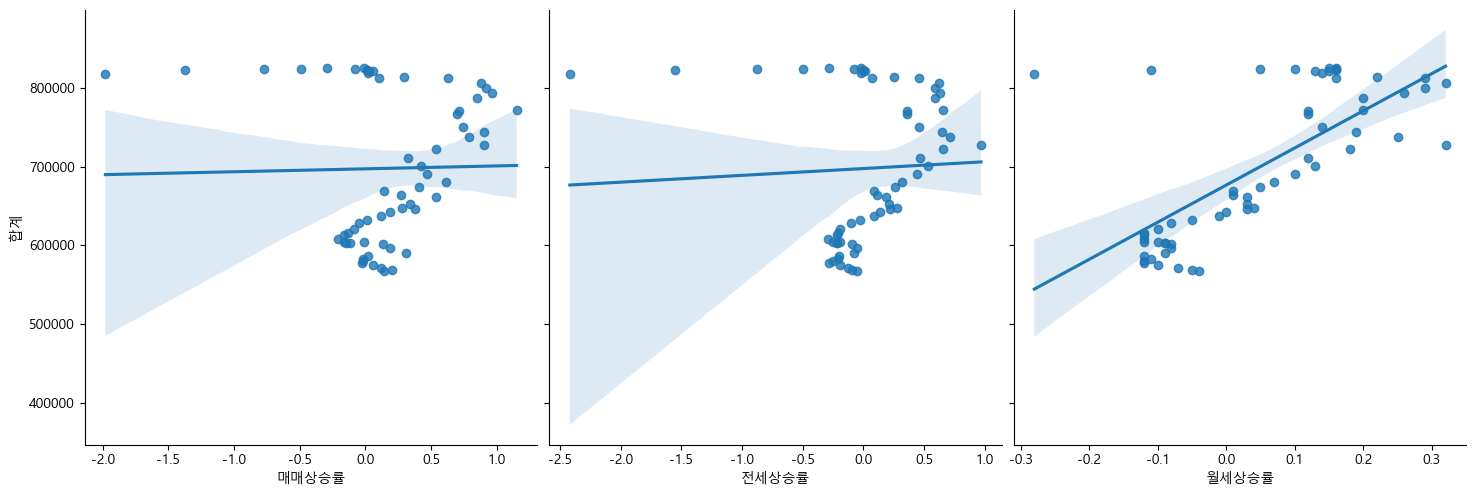

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# '%' 기호 제거 및 데이터 형식 변환
mhp['매매상승률'] = mhp['매매상승률'].str.replace('%', '').astype(float)
mhp['전세상승률'] = mhp['전세상승률'].str.replace('%', '').astype(float)
mhp['월세상승률'] = mhp['월세상승률'].str.replace('%', '').astype(float)

# 결측치 처리
mhp.fillna(0, inplace=True)

# 전처리된 데이터 확인
print(mhp.head())

# 'm2inflation' 데이터프레임의 '기준연도' 열 이름 변경
m2inflation.rename(columns={'기준연도': '기준연도_m2'}, inplace=True)

# 데이터 결합하기
merged_data = pd.merge(loan, m2inflation, left_on=['기준연도', '기준월'], right_on=['기준연도_m2', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# 상관 분석
correlation_matrix = merged_data.corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# 회귀 분석
sns.pairplot(merged_data, x_vars=['통화량', '인플레이션'], y_vars='합계', kind='reg', height=5)
sns.pairplot(merged_data, x_vars=['매매상승률', '전세상승률', '월세상승률'], y_vars='합계', kind='reg', height=5)
plt.show()

### heatmap으로 상관 분석을 수행하여 변수 간의 상관 관계를 시각화하여 표시함.

전처리_서울시_가계대출규모.csv 파일과 통화증가율_과_인플레이션율.xlsx 데이터를 불러왔으며,

가계대출, 통화증가율, 인플레이션율, 월간 주택가격 동향 데이터를 기준 연도와 월을 기준으로 결합하여

heatmap으로 상관 분석을 수행하여 변수 간의 상관 관계를 시각화하여 표시함.

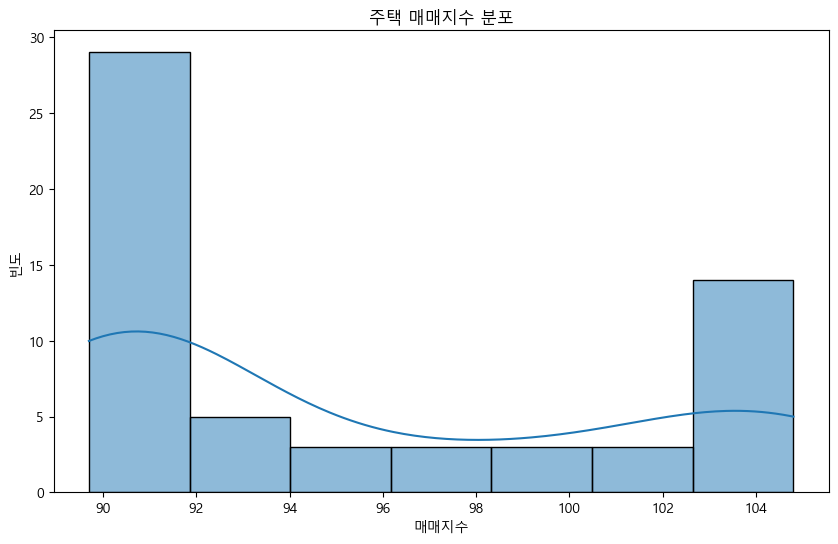

In [43]:
# 데이터 불러오기
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# 'm2inflation' 데이터프레임의 '기준연도' 열 이름 변경
m2inflation.rename(columns={'기준연도': '기준연도_m2'}, inplace=True)

# 데이터 결합하기
merged_data = pd.merge(loan, m2inflation, left_on=['기준연도', '기준월'], right_on=['기준연도_m2', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# 매매지수에 대한 시각화
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['매매지수'], kde=True)
plt.title('주택 매매지수 분포')
plt.xlabel('매매지수')
plt.ylabel('빈도')
plt.show()


### 주택 매매지수에 대한 분포를 히스토그램으로 시각화합니다. 월간주택가격동향 데이터셋의 '매매지수' 열을 사용하여 주택 매매지수의 분포를 나타

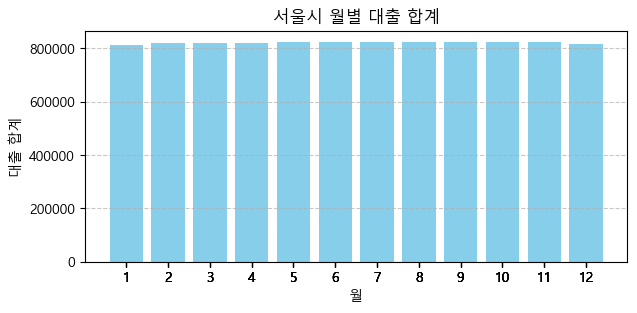

In [51]:
import matplotlib.pyplot as plt


# 월별 대출 합계 시각화
plt.figure(figsize=(7, 3))
plt.bar(loan['기준월'], loan['합계'], color='skyblue')
plt.xlabel('월')
plt.ylabel('대출 합계')
plt.title('서울시 월별 대출 합계')
plt.xticks(loan['기준월'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 수평 그리드 라인 추가
plt.show()

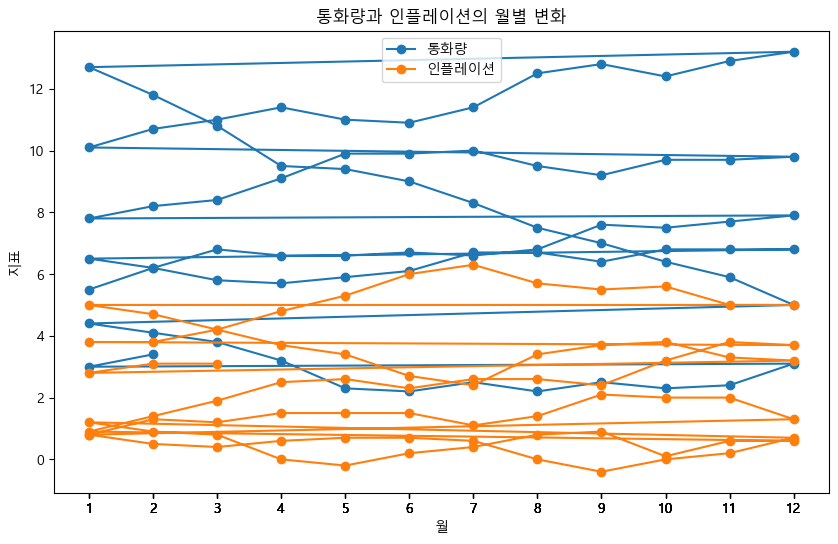

In [45]:
# 통화량과 인플레이션 시계열 그래프
plt.figure(figsize=(10, 6))
plt.plot(m2inflation['기준월'], m2inflation['통화량'], label='통화량', marker='o')
plt.plot(m2inflation['기준월'], m2inflation['인플레이션'], label='인플레이션', marker='o')
plt.xlabel('월')
plt.ylabel('지표')
plt.title('통화량과 인플레이션의 월별 변화')
plt.legend()
plt.xticks(m2inflation['기준월'])
plt.show()

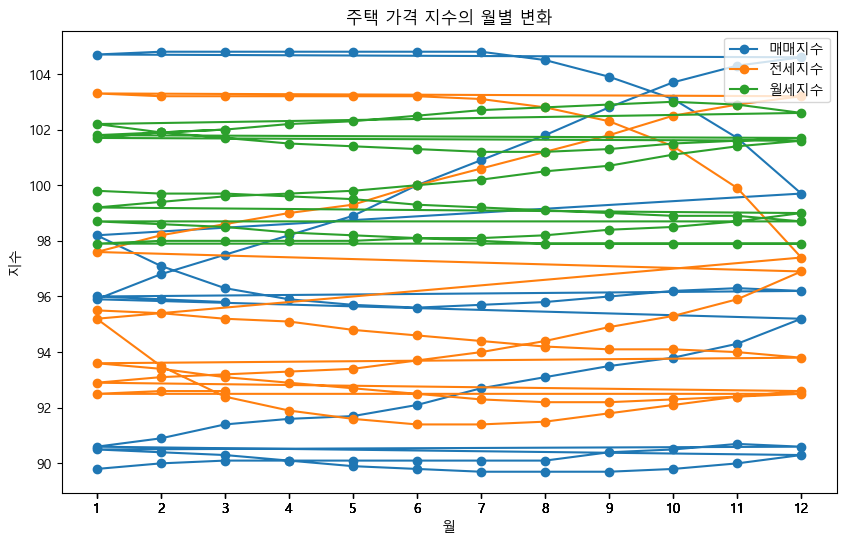

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(mhp['기준월'], mhp['매매지수'], label='매매지수', marker='o')
plt.plot(mhp['기준월'], mhp['전세지수'], label='전세지수', marker='o')
plt.plot(mhp['기준월'], mhp['월세지수'], label='월세지수', marker='o')
plt.xlabel('월')
plt.ylabel('지수')
plt.title('주택 가격 지수의 월별 변화')
plt.legend()
plt.xticks(mhp['기준월'])
plt.show()

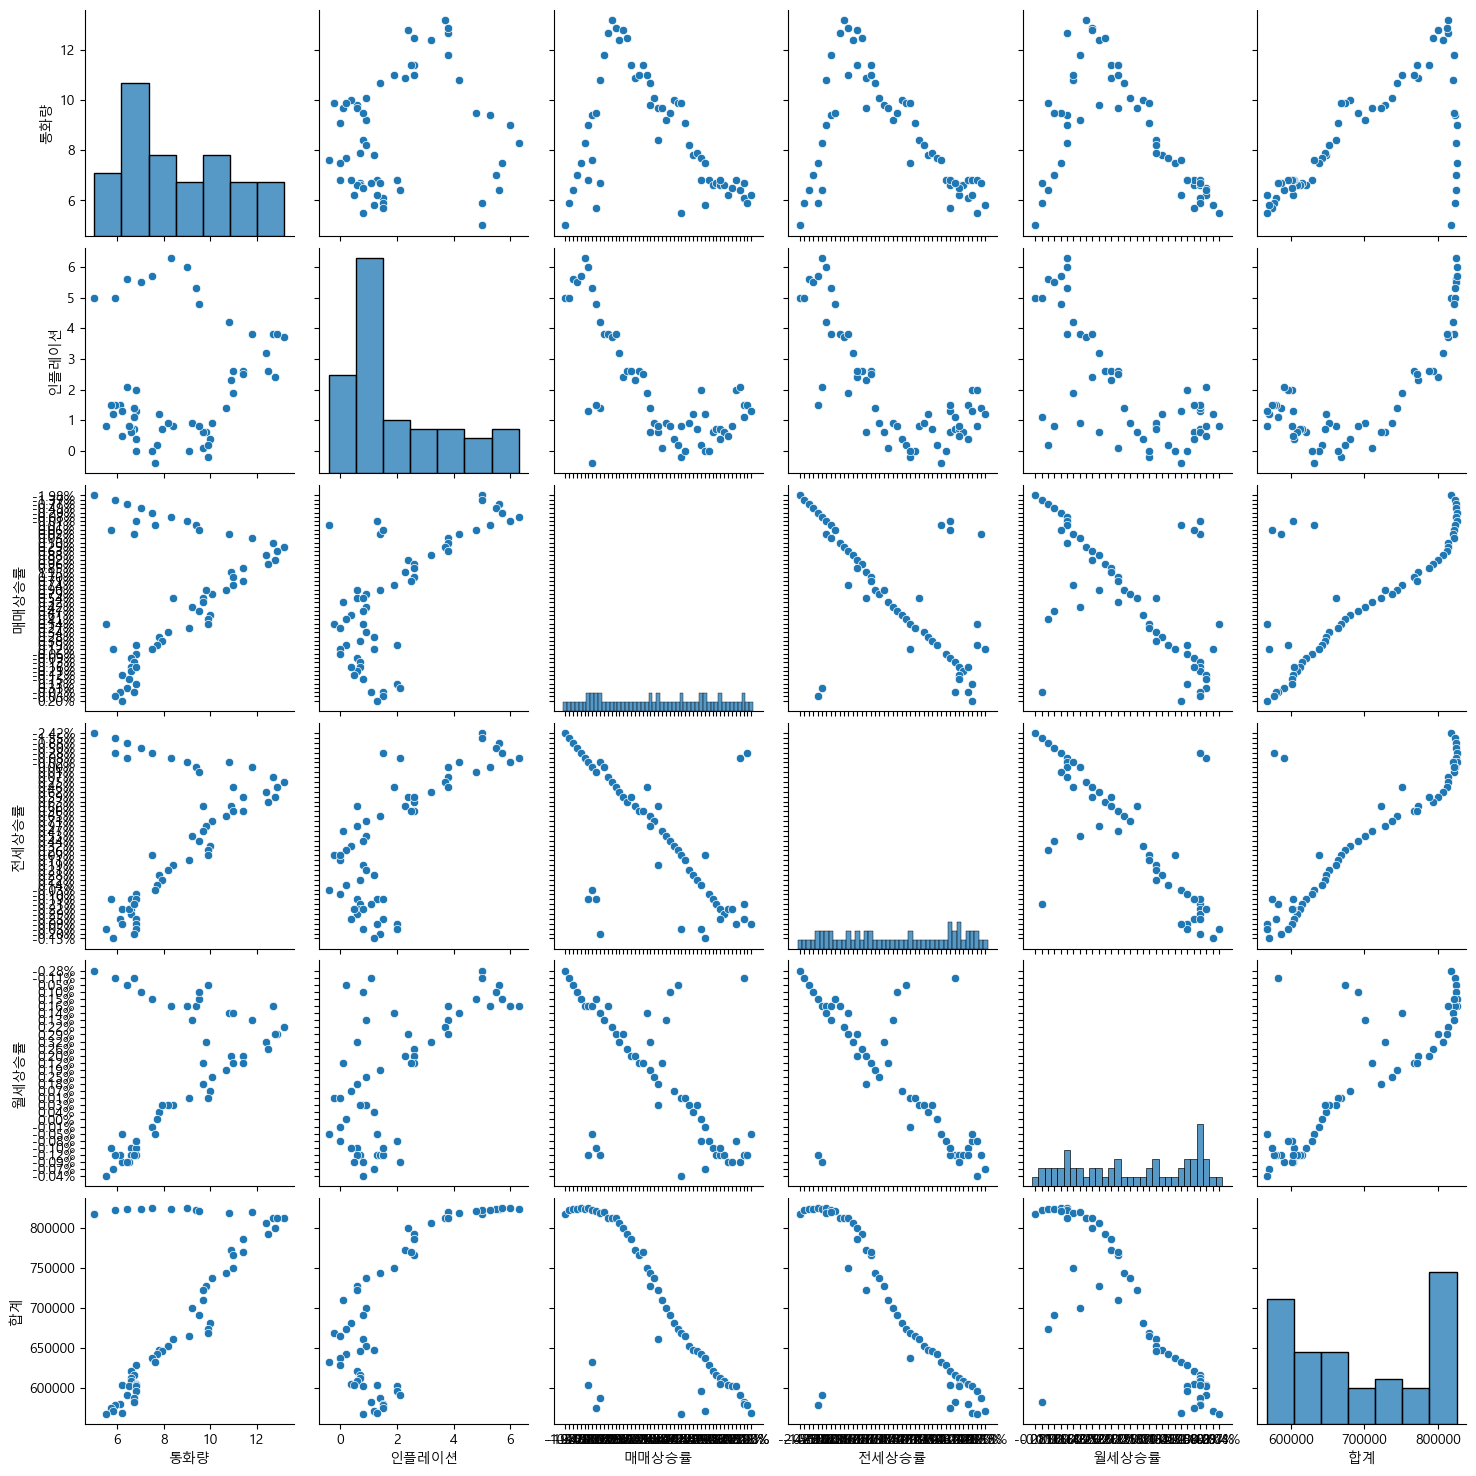

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# 'm2inflation' 데이터프레임의 '기준연도' 열 이름 변경
m2inflation.rename(columns={'기준연도': '기준연도_m2'}, inplace=True)

# 데이터 결합하기
merged_data = pd.merge(loan, m2inflation, left_on=['기준연도', '기준월'], right_on=['기준연도_m2', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# 산점도 행렬 시각화
sns.pairplot(merged_data, vars=['통화량', '인플레이션', '매매상승률', '전세상승률', '월세상승률', '합계'])
plt.show()


### 산점도 행렬을 사용하여 각 변수 쌍에 대한 산점도를 한눈에 확인할 수 있다.